# Data Preperation

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [43]:
# Load dataset
df = pd.read_csv(r"C:\Users\jaiba\Desktop\Data-Driven Profitability & Customer Lifetime Value Prediction in Retail\e-commerce transactional dataset.csv",encoding='latin1')  
df.head().T


,0,1,2,3,4
Type,DEBIT,TRANSFER,CASH,DEBIT,PAYMENT
Days for shipping (real),3,5,4,3,2
Days for shipment (scheduled),4,4,4,4,4
Benefit per order,91.25,-249.089996,-247.779999,22.860001,134.210007
Sales per customer,314.640015,311.359985,309.720001,304.809998,298.25
Delivery Status,Advance shipping,Late delivery,Shipping on time,Advance shipping,Advance shipping
Late_delivery_risk,0,1,0,0,0
Category Id,73,73,73,73,73
Category Name,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods
Customer City,Caguas,Caguas,San Jose,Los Angeles,Caguas


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [45]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [46]:
df.isnull().sum().sort_values(ascending=False)

Product Description              180519
Order Zipcode                    155679
Customer Lname                        8
Customer Zipcode                      3
Type                                  0
Order Profit Per Order                0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Region                          0
order date (DateOrders)               0
Order State                           0
Order Status                          0
Product Card Id                       0
Product Category Id                   0
Product Image                         0
Product Name                          0
Product Price                         0
Product Status                        0


In [47]:
# Drop mostly or fully empty columns
df.drop(columns=['Product Description', 'Order Zipcode'], inplace=True)

# Fill small missing fields with placeholders
df['Customer Lname'] = df['Customer Lname'].fillna("Unknown")
df['Customer Zipcode'] = df['Customer Zipcode'].fillna("Unknown")

In [48]:
df.isnull().sum().sort_values(ascending=False)

Type                             0
Order Item Total                 0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Profit Per Order           0
Order Country                    0
Order Region                     0
Order State                      0
Order Status                     0
Product Card Id                  0
Product Category Id              0
Product Image                    0
Product Name                     0
Product Price                    0
Product Status                   0
shipping date (DateOrders)       0
Order Customer Id                0
Order City                       0
Days for shipping (real)         0
Customer Fname                   0
Days for shipment (s

In [49]:
# Convert date columns
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')

# Create new feature: shipping delay in days
df['shipping Delay (Days)'] = (df['shipping date (DateOrders)'] - df['order date (DateOrders)']).dt.days


**Purpose:**
- Convert string-based date columns into datetime objects using `pd.to_datetime()`.
- Calculate shipping delay in days by subtracting the order date from the shipping date.

**Key Details:**
- `errors='coerce'` converts invalid dates to `NaT` (Not a Time) to avoid crashes.
- `.dt.days` extracts the delay as an integer value in days.

**Why It Matters:**
Shipping delay is crucial for:
1. Profitability prediction  
2. Late delivery risk modeling  
3. Logistics optimization  

--- 

Super clean, practical, and a solid building block for deeper data analysis.

## feature engineering

In [50]:
# Discount Rate as percent (if not already)
df['Discount Percent'] = (df['Order Item Discount'] / df['Product Price']).round(2)

# Profit Margin
df['Profit Margin'] = (df['Order Profit Per Order'] / df['Order Item Total']).round(2)

# Fill or handle missing values if needed
df['shipping Delay (Days)'] = df['shipping Delay (Days)'].fillna(0)
df['Discount Percent'] = df['Discount Percent'].fillna(0)
df['Profit Margin'] = df['Profit Margin'].fillna(0)


### ENCODING

In [51]:
# Select categorical columns you might want to encode
categoricals = ['Shipping Mode', 'Market', 'Customer Segment', 'Order Region', 'Delivery Status']

# Encode with LabelEncoder
le = LabelEncoder()
for col in categoricals:
    df[col] = le.fit_transform(df[col].astype(str))


# EDA - PROFITS AND CUSTOMER INSIGHTS

In [52]:
# Shape and basic info
print("Shape of the dataset:", df.shape)
df.info()
df.describe(include='all').T

Shape of the dataset: (180519, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  int32         
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               18

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Type,180519,4,DEBIT,69295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days for shipping (real),180519.0,NaN,NaN,NaN,3.497654,0.0,2.0,3.0,5.0,6.0,1.623722
Days for shipment (scheduled),180519.0,NaN,NaN,NaN,2.931847,0.0,2.0,4.0,4.0,4.0,1.374449
Benefit per order,180519.0,NaN,NaN,NaN,21.974989,-4274.97998,7.0,31.52,64.800003,911.799988,104.433526
Sales per customer,180519.0,NaN,NaN,NaN,183.107609,7.49,104.379997,163.990005,247.399994,1939.98999,120.04367
Delivery Status,180519.0,NaN,NaN,NaN,1.169256,0.0,1.0,1.0,1.0,3.0,0.978838
Late_delivery_risk,180519.0,NaN,NaN,NaN,0.548291,0.0,0.0,1.0,1.0,1.0,0.497664
Category Id,180519.0,NaN,NaN,NaN,31.851451,2.0,18.0,29.0,45.0,76.0,15.640064
Category Name,180519,50,Cleats,24551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer City,180519,563,Caguas,66770,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Profit Distribution & Relationships

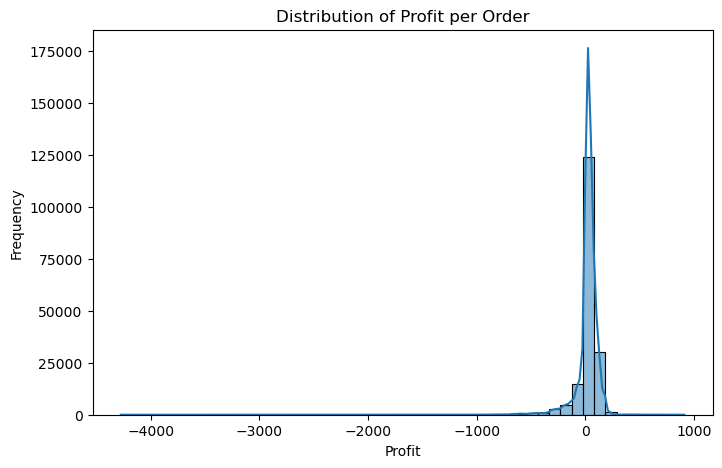

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Order Profit Per Order'], bins=50, kde=True)
plt.title("Distribution of Profit per Order")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

###  Profit vs. Sales

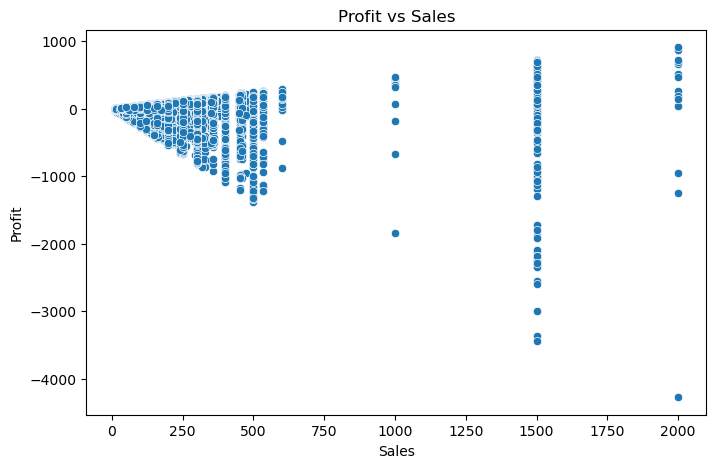

In [54]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sales', y='Order Profit Per Order', data=df)
plt.title("Profit vs Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


## Profitability by Category

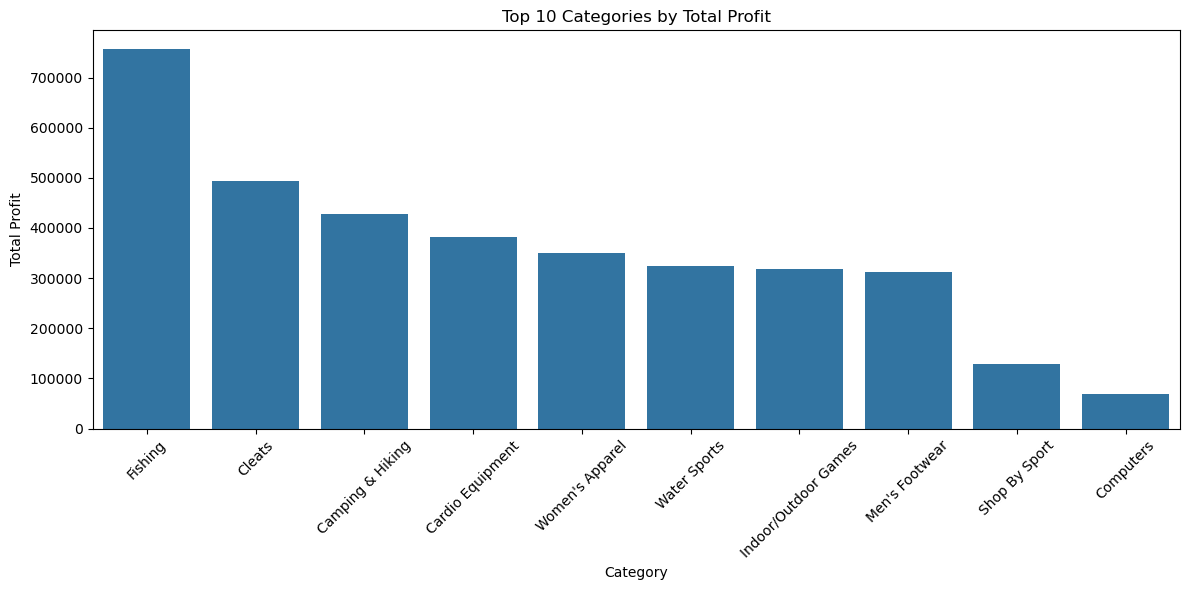

In [55]:
plt.figure(figsize=(12, 6))

# Group by category and get top 10 profitable categories
profit_by_category = (
    df.groupby('Category Name')['Order Profit Per Order']
    .sum()
    .sort_values(ascending=False)
    .head(10)  # Show only top 10
)

# Plot
sns.barplot(x=profit_by_category.index, y=profit_by_category.values)
plt.xticks(rotation=45)
plt.title("Top 10 Categories by Total Profit")
plt.ylabel("Total Profit")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


## Does Shipping Delay Affect Profit?

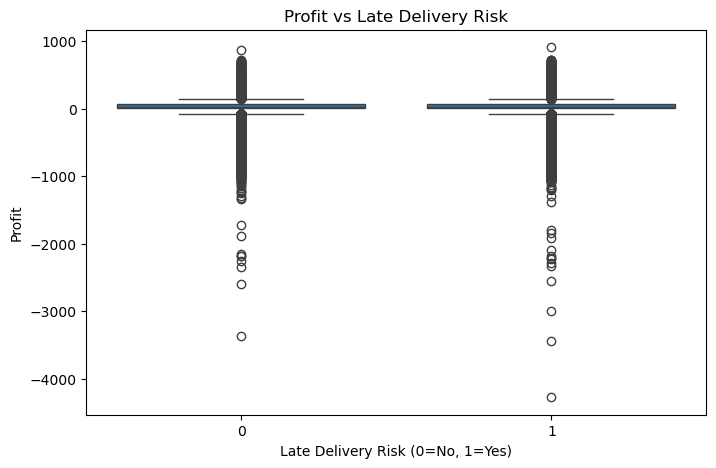

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Late_delivery_risk', y='Order Profit Per Order', data=df)
plt.title("Profit vs Late Delivery Risk")
plt.xlabel("Late Delivery Risk (0=No, 1=Yes)")
plt.ylabel("Profit")
plt.show()

## Profit by customer segment

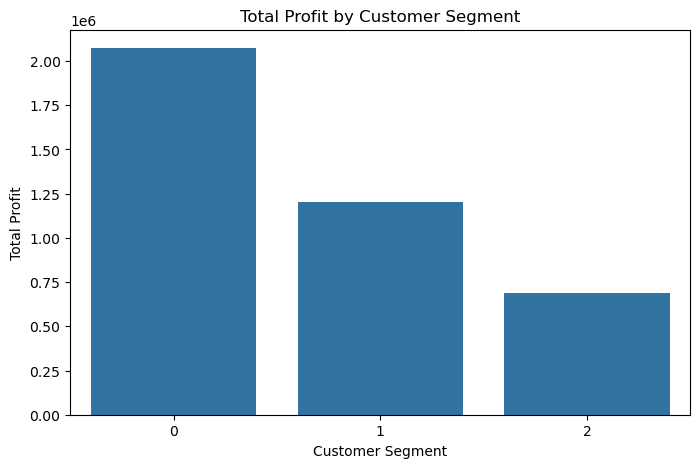

In [57]:
plt.figure(figsize=(8, 5))
segment_profit = df.groupby('Customer Segment')['Order Profit Per Order'].sum().sort_values(ascending=False)
sns.barplot(x=segment_profit.index, y=segment_profit.values)
plt.title("Total Profit by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Profit")
plt.show()


## Correlation Heatmap:

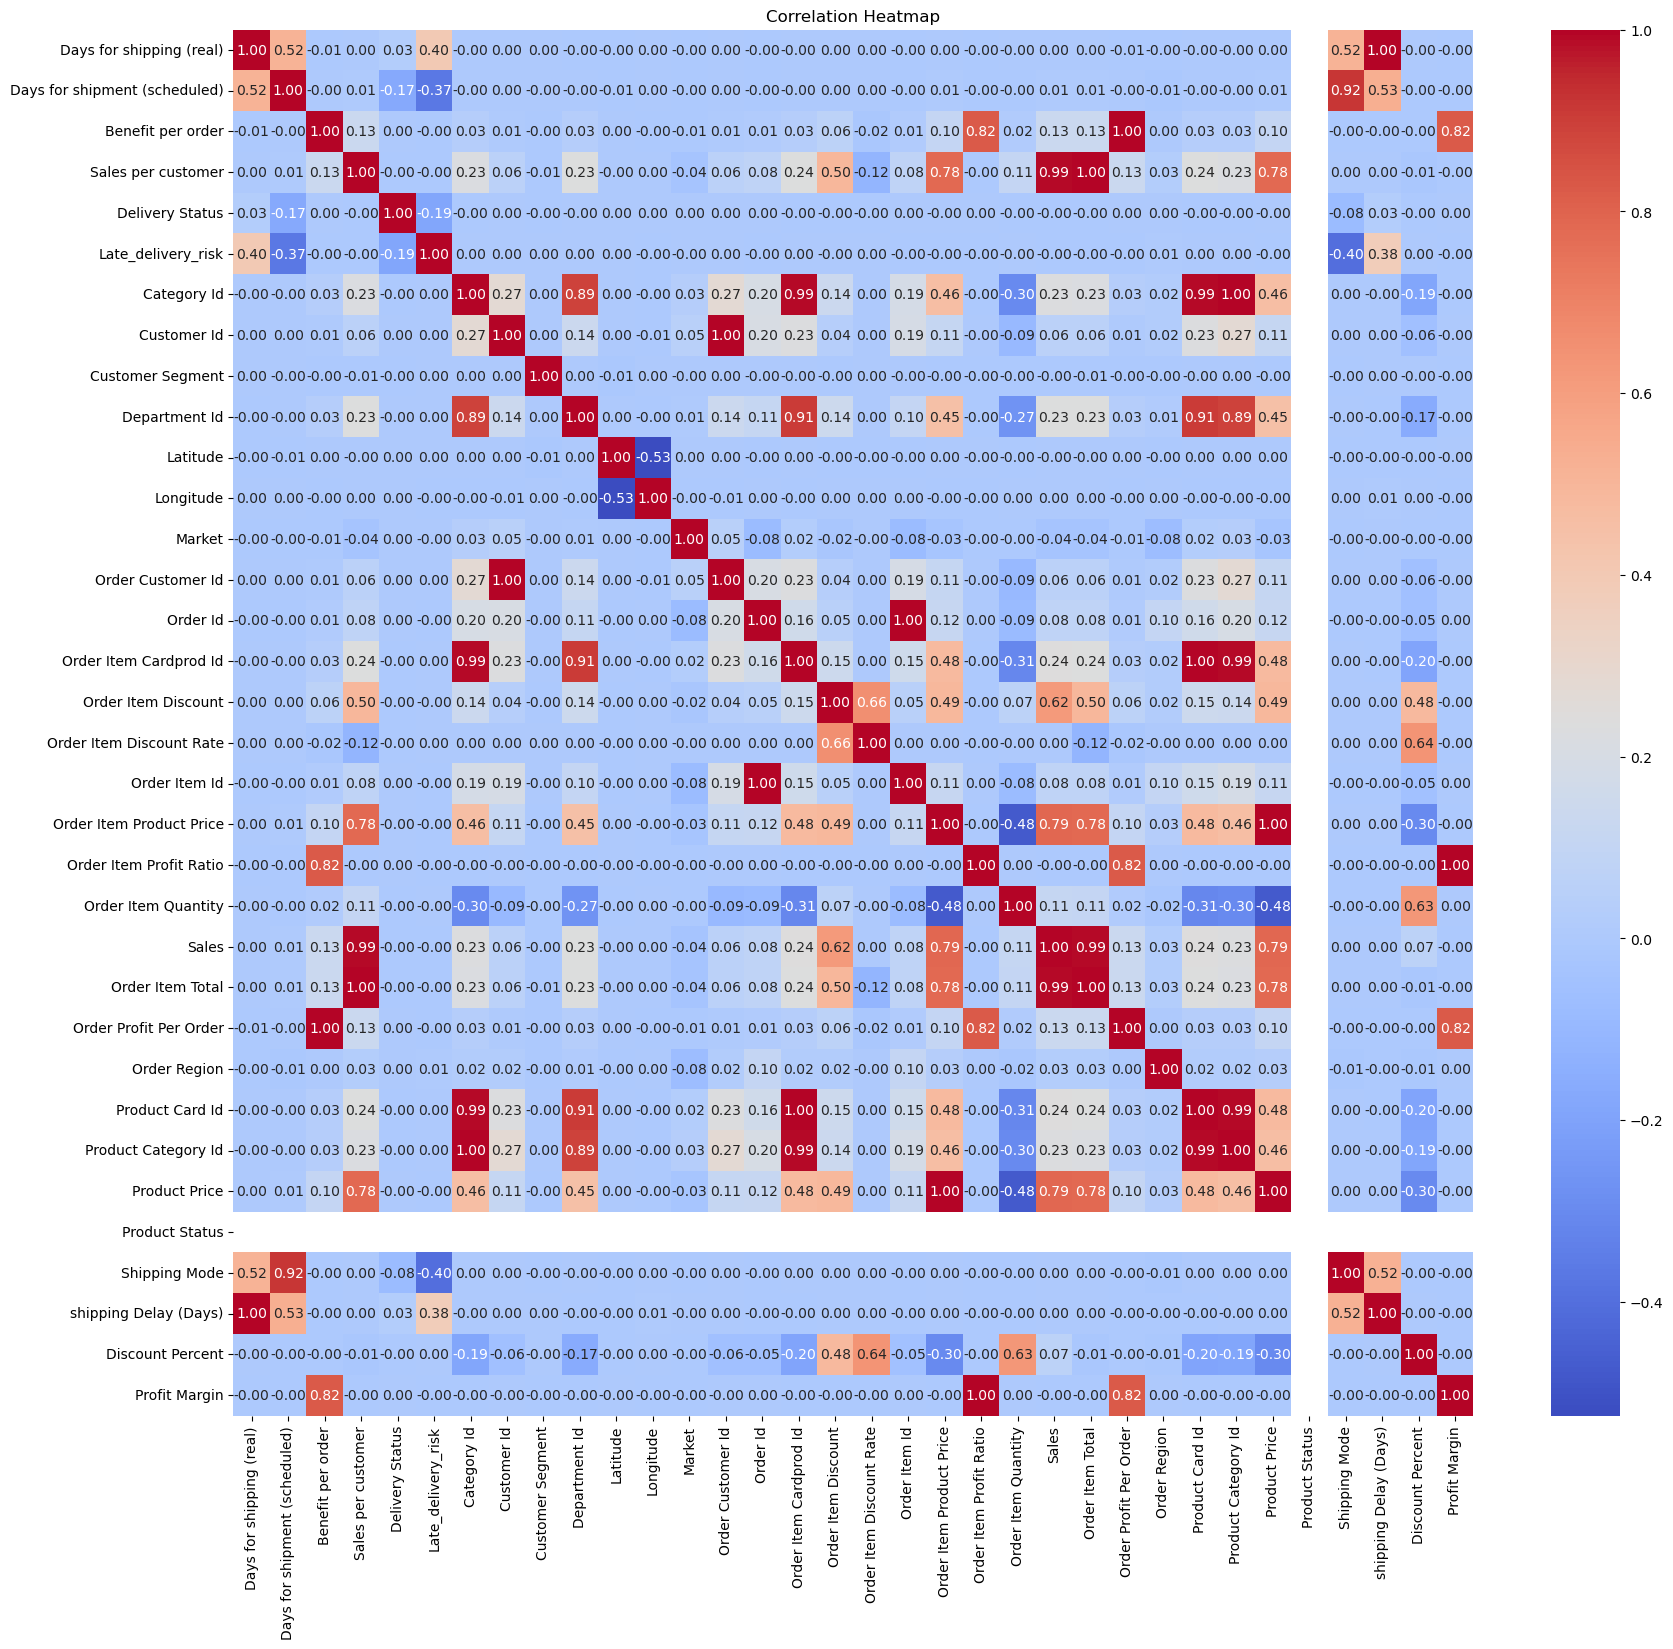

In [58]:
plt.figure(figsize=(20, 18))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


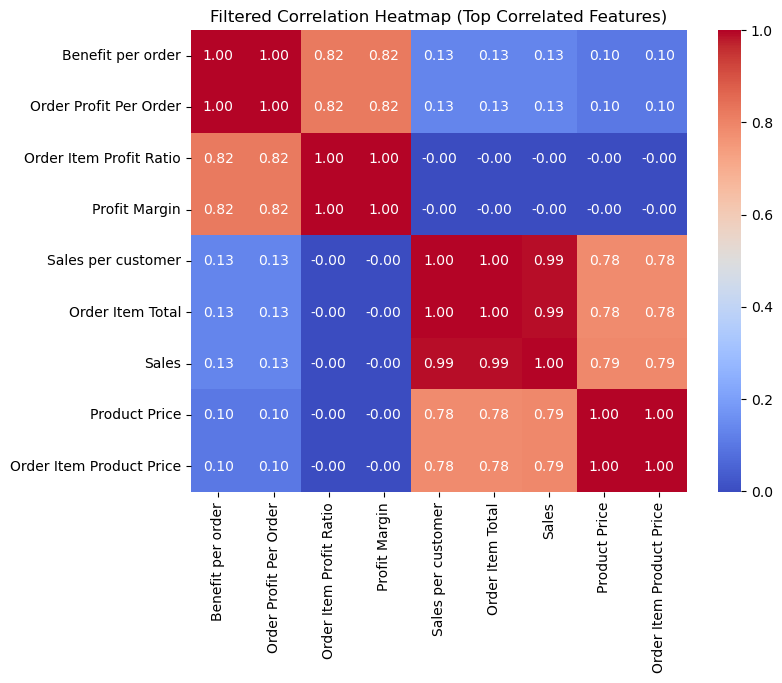

In [59]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include='number')

# Get correlation with target variable
target_corr = numeric_cols.corr()['Order Profit Per Order'].sort_values(ascending=False)

# Top correlations (optional: set threshold like >0.1 or <-0.1)
strong_corrs = target_corr[abs(target_corr) > 0.1].index

plt.figure(figsize=(8, 6))
sns.heatmap(df[strong_corrs].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Filtered Correlation Heatmap (Top Correlated Features)")
plt.show()



# Outliers processing

In [60]:
# Set the target
target_col = 'Order Profit Per Order'

# Calculate IQR
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset
df_clean = df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

print(f"Before: {df.shape[0]} rows")
print(f"After: {df_clean.shape[0]} rows")


Before: 180519 rows
After: 161577 rows


## EDA -- After Outlier processing

### Profit by Customer Segment

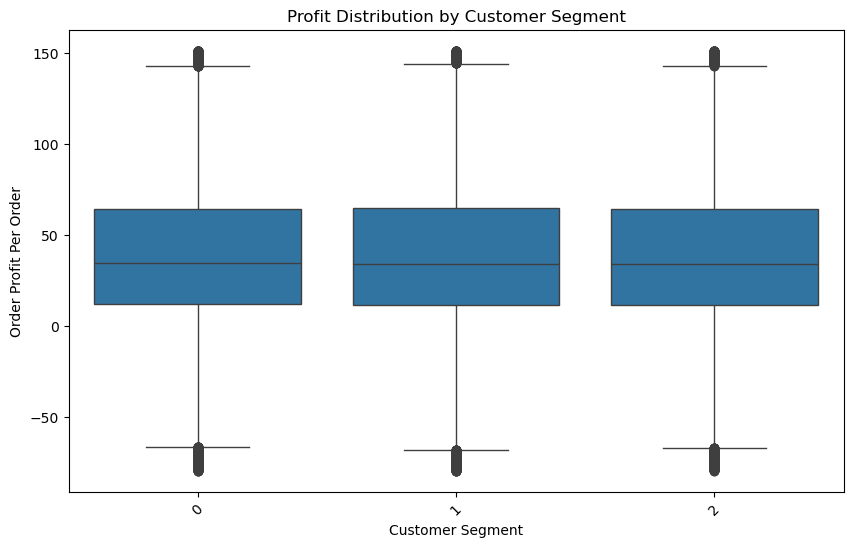

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x='Customer Segment', y='Order Profit Per Order')
plt.title('Profit Distribution by Customer Segment')
plt.xticks(rotation=45)
plt.show()


### Profit by Product Category

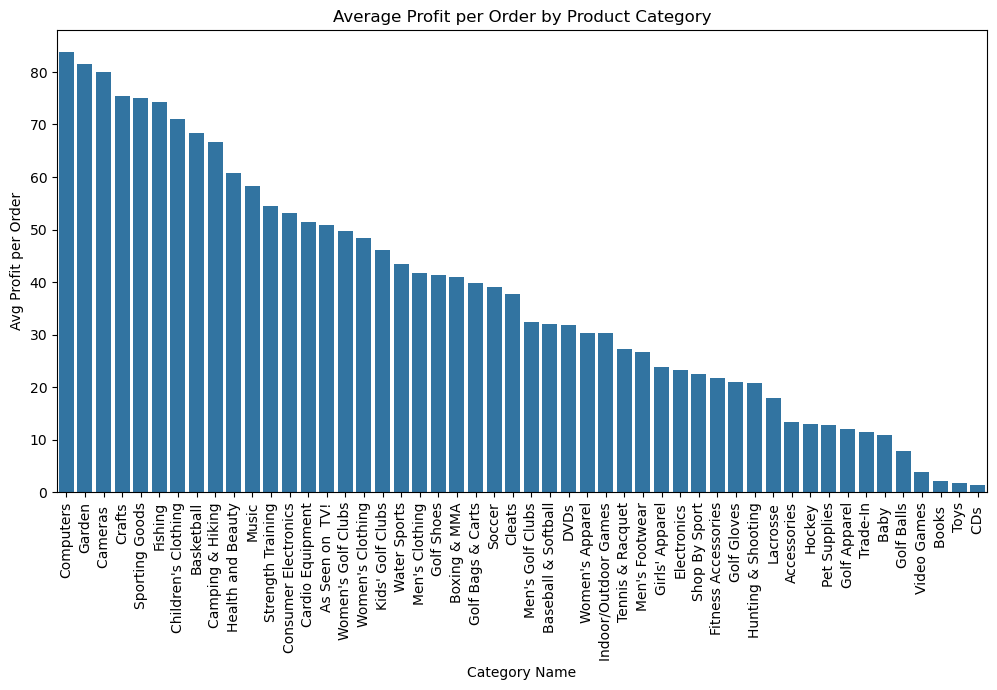

In [62]:
plt.figure(figsize=(12,6))
category_profit = df_clean.groupby('Category Name')['Order Profit Per Order'].mean().sort_values(ascending=False)
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Average Profit per Order by Product Category')
plt.xticks(rotation=90)
plt.ylabel('Avg Profit per Order')
plt.show()


### Profit by Region

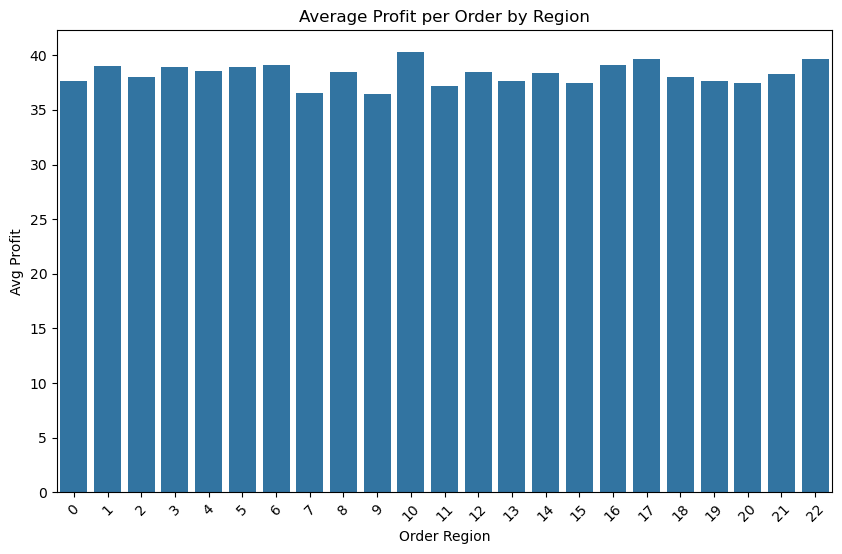

In [63]:
plt.figure(figsize=(10,6))
region_profit = df_clean.groupby('Order Region')['Order Profit Per Order'].mean().sort_values(ascending=False)
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title('Average Profit per Order by Region')
plt.ylabel('Avg Profit')
plt.xticks(rotation=45)
plt.show()


### Orders & Profit Over Time

C:\Users\jaiba\AppData\Local\Temp\ipykernel_11660\2688681309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'Order Month'] = df_clean['order date (DateOrders)'].dt.to_period('M')


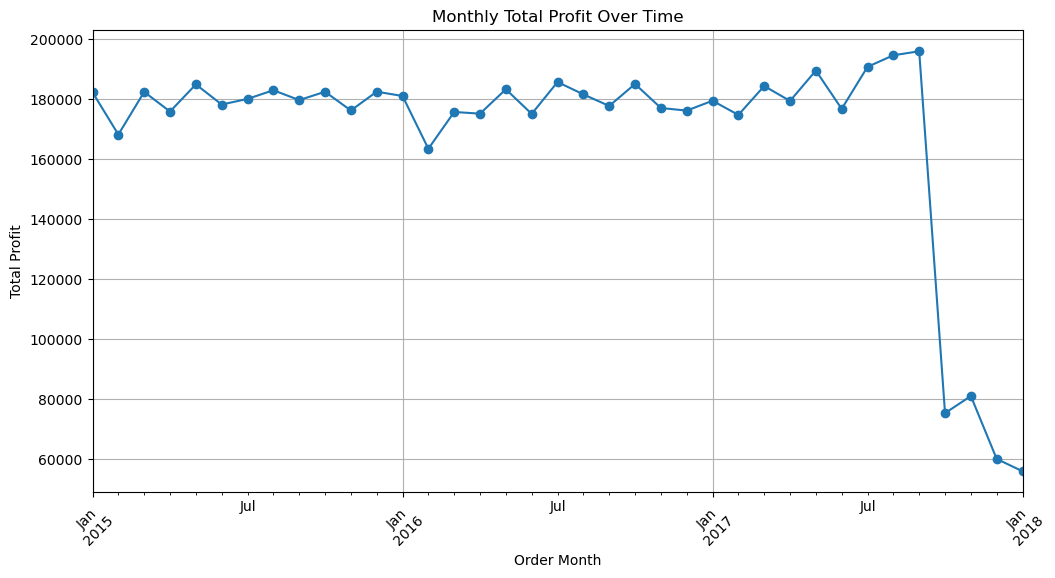

In [64]:
df_clean.loc[:, 'Order Month'] = df_clean['order date (DateOrders)'].dt.to_period('M')

monthly_profit = df_clean.groupby('Order Month')['Order Profit Per Order'].sum()

plt.figure(figsize=(12,6))
monthly_profit.plot(kind='line', marker='o')
plt.title('Monthly Total Profit Over Time')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid()
plt.show()


#### Drop analysis

In [65]:

df_clean = df_clean.copy()

# Ensure datetime is parsed correctly
df_clean.loc[:, 'order date (DateOrders)'] = pd.to_datetime(df_clean['order date (DateOrders)'])

# Extract Order Quarter
df_clean.loc[:, 'Order Quarter'] = df_clean['order date (DateOrders)'].dt.to_period('Q')

# Calculate discount value per row
df_clean.loc[:, 'Discount Value'] = df_clean['Order Item Discount'] * df_clean['Order Item Quantity']

# Group by quarter including discount value
quarterly_metrics = df_clean.groupby('Order Quarter').agg({
    'Order Profit Per Order': 'sum',
    'Order Id': 'nunique',
    'Order Item Total': 'sum',
    'Customer Id': 'nunique',
    'shipping Delay (Days)': 'mean',
    'Order Item Discount': 'mean',
    'Discount Value': 'sum'
}).rename(columns={
    'Order Profit Per Order': 'Total Profit',
    'Order Id': 'Order Count',
    'Order Item Total': 'Total Sales',
    'Customer Id': 'Customer Count',
    'shipping Delay (Days)': 'Avg Shipping Delay',
    'Order Item Discount': 'Avg Discount',
    'Discount Value': 'Total Discount Value'
})

# Display recent quarters
print(quarterly_metrics.tail(6))


                Total Profit  Order Count   Total Sales  Customer Count  \
Order Quarter                                                             
2016Q4         538523.430001         5146  2.392572e+06            4226   
2017Q1         538823.200107         5008  2.356193e+06            4107   
2017Q2         545934.050271         5042  2.422274e+06            4143   
2017Q3         581638.800288         5135  2.549602e+06            4192   
2017Q4         216365.539342         4953  1.091225e+06            4953   
2018Q1          55921.879937         1969  2.520169e+05            1969   

               Avg Shipping Delay  Avg Discount  Total Discount Value  
Order Quarter                                                          
2016Q4                   3.460153     19.205408         644391.801458  
2017Q1                   3.483623     19.338021         635931.071448  
2017Q2                   3.483130     20.104506         625429.811316  
2017Q3                   3.442964     2

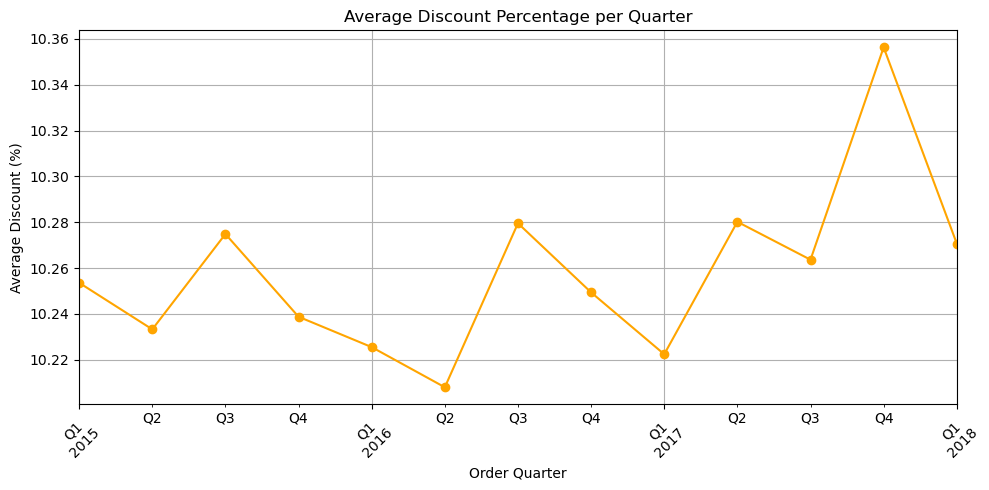

In [66]:
df_clean = df_clean.copy()

# Convert to datetime and extract quarter
df_clean.loc[:, 'order date (DateOrders)'] = pd.to_datetime(df_clean['order date (DateOrders)'])
df_clean.loc[:, 'Order Quarter'] = df_clean['order date (DateOrders)'].dt.to_period('Q')

# Group by quarter and calculate average discount %
avg_discount_per_quarter = df_clean.groupby('Order Quarter')['Order Item Discount Rate'].mean() * 100

# Plot
plt.figure(figsize=(10, 5))
avg_discount_per_quarter.plot(kind='line', marker='o', color='orange')

plt.title('Average Discount Percentage per Quarter')
plt.xlabel('Order Quarter')
plt.ylabel('Average Discount (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Order Profitability Prediction 
Prepare Data for Regression Modeling

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Make a copy to work safely
df_model = df_clean.copy()

# ✅ Choose target variable
target = 'Order Profit Per Order'

# ✅ Select initial feature candidates (numeric + low-cardinality categorical)
features = [
    'Order Item Quantity',
    'Order Item Discount',
    'Order Item Product Price',
    'Order Item Total',
    'Product Price',
    'Sales',
    'Order Item Profit Ratio',
    'Order Region',
    'Order State',
    'Shipping Mode',
    'Category Name',
    'Department Name',
    'Customer Segment'
]

# ✅ Separate features and target
X = df_model[features]
y = df_model[target]

# ✅ Identify categorical features
cat_cols = X.select_dtypes(include='object').columns.tolist()

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# ✅ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


## XGBoost Model + Evaluation

In [68]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


📊 Model Evaluation:
MAE:  0.44
RMSE: 0.70
R²:   0.9997


### Feature Importance

C:\Users\jaiba\AppData\Local\Temp\ipykernel_11660\3276117774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis", legend=False)


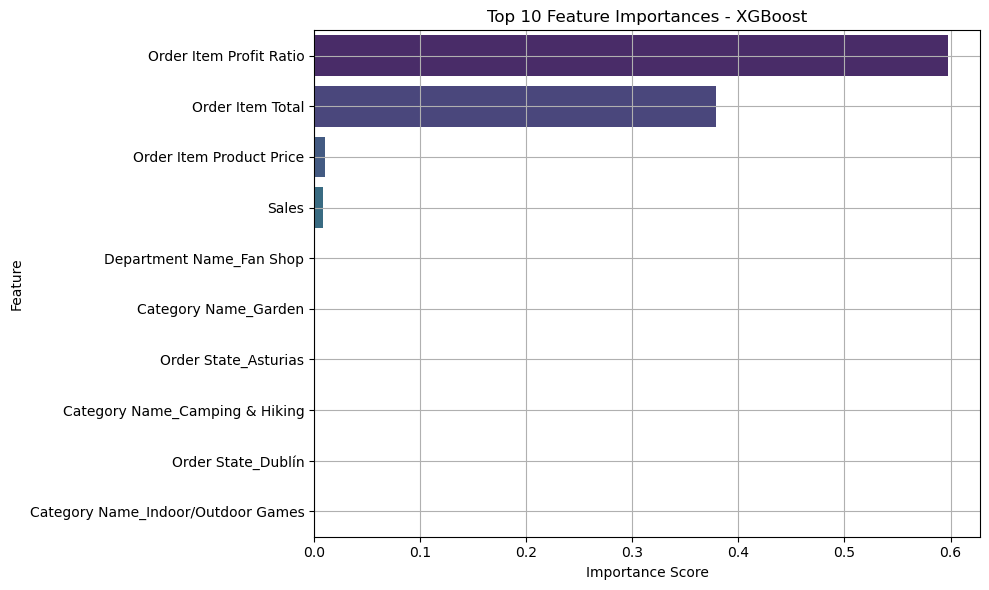

In [69]:
# Get feature importance from the trained model
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Sort and visualize top 15
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis", legend=False)
plt.title('Top 10 Feature Importances - XGBoost') 
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()


# CUSTOMER SEGMENTATION

## CUSTOMER SEGMENTATION AND ANALYSIS

### DATA PREPERATION:

In [70]:
import pandas as pd

# Group data at customer level
customer_data = df.groupby('Customer Id').agg({
    'Order Id': 'nunique',  # Frequency
    'Sales': 'sum',         # Monetary
    'order date (DateOrders)': 'max',  # Recency
    'Order Item Quantity': 'sum',
    'Order Profit Per Order': 'mean',
    'Late_delivery_risk': 'mean'
}).reset_index()

# Rename columns
customer_data.columns = ['Customer Id', 'Order Frequency', 'Total Sales', 'Last Order Date',
                         'Total Quantity', 'Avg Profit per Order', 'Avg Late Delivery Risk']

# Calculate Recency in days from most recent date
latest_date = df['order date (DateOrders)'].max()
customer_data['Recency (Days)'] = (latest_date - customer_data['Last Order Date']).dt.days

# Drop original date column
customer_data.drop(columns='Last Order Date', inplace=True)

# Preview
customer_data.head()


,Customer Id,Order Frequency,Total Sales,Total Quantity,Avg Profit per Order,Avg Late Delivery Risk,Recency (Days)
0,1,1,499.950012,5,159.690002,1.000000,792
1,2,4,1819.730034,19,20.874000,0.300000,136
2,3,5,3537.680094,33,18.582778,0.000000,229
3,4,4,1719.630030,34,-31.427142,0.785714,380
4,5,3,1274.750023,18,44.264286,0.714286,457


### Data Normalization for Clustering

In [71]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for clustering
features_to_cluster = customer_data.drop(columns=['Customer Id'])

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
scaled_features = scaler.fit_transform(features_to_cluster)

# Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_features, columns=features_to_cluster.columns)
scaled_df.head()


,Order Frequency,Total Sales,Total Quantity,Avg Profit per Order,Avg Late Delivery Risk,Recency (Days)
0,-0.898450,-0.763865,-0.708824,1.063873,1.175365,2.868294
1,0.335793,0.022989,0.020973,-0.042294,-0.647712,-0.421731
2,0.747207,1.047232,0.750770,-0.060552,-1.429031,0.044690
3,0.335793,-0.036691,0.802899,-0.459060,0.617280,0.801998
4,-0.075621,-0.301928,-0.031155,0.144093,0.431252,1.188175


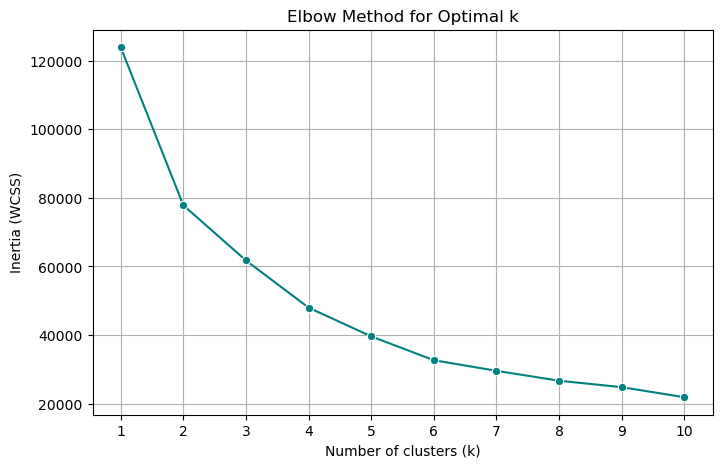

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Range of k values to try
k_range = range(1, 11)
inertias = []

# Loop through k values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(k_range), y=inertias, marker='o', color='teal')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


This is actually looking pretty clean.
1. From k=1 to k=2, there's a massive drop (expected — we go from one big lump to at least some structure).
2. k=2 to k=3 and k=3 to k=4 still show a decent drop.
3. From k=4 onward, the rate of decrease starts to flatten — you’re paying more for less gain.
4. By the time you hit k=5 or 6, inertia is still dropping, but nowhere near as dramatically.

In [73]:
# KMeans Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(scaled_df)

# Check how many customers in each group
cluster_counts = customer_data['Cluster'].value_counts().sort_index()
print(cluster_counts)


Cluster
0    4134
1    5464
2    5054
3    6000
Name: count, dtype: int64


In [74]:
# Cluster Profiling
cluster_profile = customer_data.groupby('Cluster').mean(numeric_only=True)
cluster_profile = cluster_profile.round(2)
cluster_profile

,Customer Id,Order Frequency,Total Sales,Total Quantity,Avg Profit per Order,Avg Late Delivery Risk,Recency (Days)
Cluster,,,,,,,
0,15553.96,1.12,379.10,2.03,29.73,0.01,76.52
1,6187.61,6.44,4038.18,44.20,21.81,0.55,238.60
2,15695.00,1.11,365.70,1.94,33.97,1.00,74.15
3,6225.84,3.39,1884.11,20.72,21.15,0.55,425.08


#### Cluster Profiling
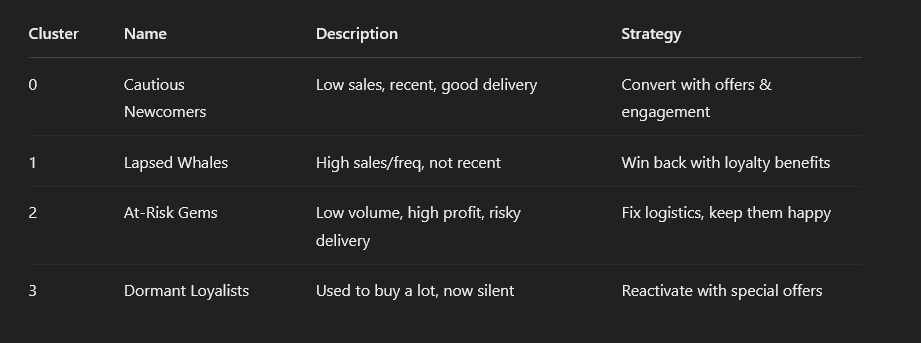

In [75]:
# Define mapping of cluster index to segment persona
cluster_name_map = {
    0: 'Cautious Newcomers',
    1: 'Lapsed Whales',
    2: 'At-Risk Gems',
    3: 'Dormant Loyalists'
}

### Visualizing Customer Segments

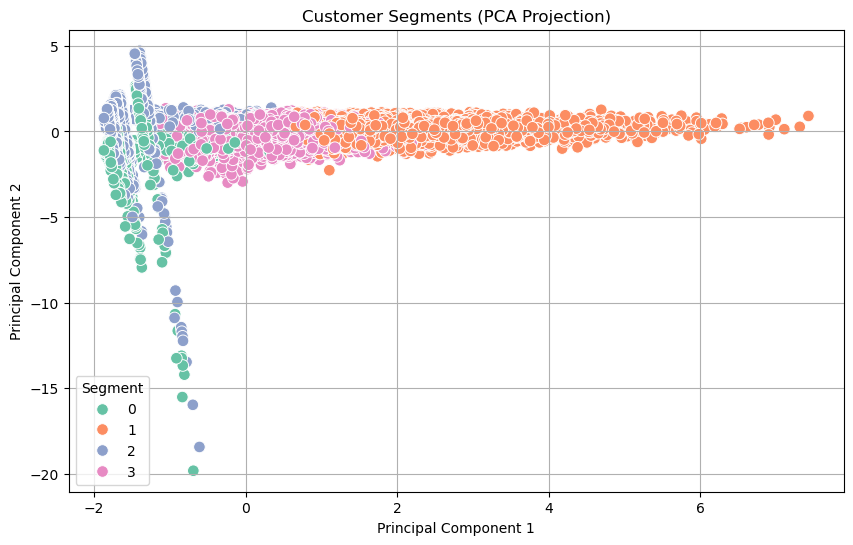

In [77]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Segment'] = customer_data['Cluster']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Segment', data=pca_df, palette='Set2', s=70)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segment')
plt.grid(True)
plt.show()


## CLTV Prediction
Goal: Predict the Customer Lifetime Value (CLTV) for each customer, broken down by cluster.
This tells you how much revenue a customer is expected to generate over their entire relationship with your business.

Objective:
Predict Customer Lifetime Value (CLTV) over, say, the next 6 months based on historical behavior.

#### Data preperation

In [78]:
from lifetimes.utils import summary_data_from_transaction_data
import pandas as pd

# Assuming your DataFrame is called df and order date column is parsed as datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Create summary data required by lifetimes
summary = summary_data_from_transaction_data(df,
                                              customer_id_col='Customer Id',
                                              datetime_col='order date (DateOrders)',
                                              monetary_value_col='Order Profit Per Order',
                                              observation_period_end=df['order date (DateOrders)'].max())

summary = summary[summary['monetary_value'] > 0]  # Gamma-Gamma needs positive profit
summary.head()


,frequency,recency,T,monetary_value
Customer Id,,,,
2,3.0,769.0,905.0,113.479999
3,4.0,552.0,781.0,65.445000
5,2.0,137.0,594.0,54.080002
6,3.0,371.0,1017.0,169.560001
7,6.0,761.0,981.0,140.079998


#### The BG/NBD Model
This model predicts how often a customer will make a purchase in the future.

In [79]:
from lifetimes import BetaGeoFitter

# Initialize and fit the BG/NBD model
bgf = BetaGeoFitter(penalizer_coef=0.01)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

# Predict expected purchases in next 180 days (6 months)
summary['predicted_purchases_6m'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    180, 
    summary['frequency'], 
    summary['recency'], 
    summary['T']
)

summary[['frequency', 'recency', 'T', 'predicted_purchases_6m']].head()


,frequency,recency,T,predicted_purchases_6m
Customer Id,,,,
2,3.0,769.0,905.0,0.663733
3,4.0,552.0,781.0,0.840805
5,2.0,137.0,594.0,0.684146
6,3.0,371.0,1017.0,0.620447
7,6.0,761.0,981.0,0.954903


#### Gamma-Gamma model

In [80]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(summary['frequency'], summary['monetary_value'])

# Predict avg profit per transaction
summary['expected_avg_profit'] = ggf.conditional_expected_average_profit(
    summary['frequency'], 
    summary['monetary_value']
)

summary[['monetary_value', 'expected_avg_profit']].head()


,monetary_value,expected_avg_profit
Customer Id,,
2,113.479999,120.695119
3,65.445000,68.903484
5,54.080002,60.352093
6,169.560001,179.743774
7,140.079998,144.280430


#### CUSTOMER LIFE-TIME VALUE (6 months)

In [81]:
# Calculate 6-month CLTV
summary['CLTV_6m'] = ggf.customer_lifetime_value(
    bgf, 
    summary['frequency'], 
    summary['recency'], 
    summary['T'], 
    summary['monetary_value'], 
    time=6,      # Time in months
    discount_rate=0.01  # Monthly discount rate ~12% annually
)

summary = summary.reset_index()
summary[['Customer Id', 'CLTV_6m']].sort_values(by='CLTV_6m', ascending=False).head()


,Customer Id,CLTV_6m
3758,5021,398.657726
1951,2626,328.925820
1348,1819,316.946323
7118,9512,313.959913
1420,1915,311.997063


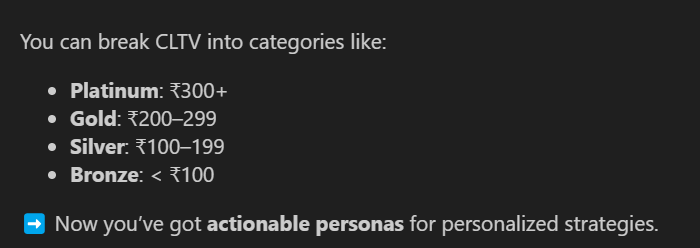

In [82]:
def label_cltv_tier(cltv):
    if cltv >= 300:
        return 'Platinum'
    elif cltv >= 200:
        return 'Gold'
    elif cltv >= 100:
        return 'Silver'
    else:
        return 'Bronze'

# Apply the function to assign tiers
summary['CLTV_Tier'] = summary['CLTV_6m'].apply(label_cltv_tier)

# Optional: Check how many customers fall into each tier
tier_counts = summary['CLTV_Tier'].value_counts()
print(tier_counts)

# Display sample output
summary[['Customer Id', 'CLTV_6m', 'CLTV_Tier']].sort_values(by='CLTV_6m', ascending=False).head(10)


CLTV_Tier
Bronze      6259
Silver      2876
Gold         168
Platinum       7
Name: count, dtype: int64


,Customer Id,CLTV_6m,CLTV_Tier
3758,5021,398.657726,Platinum
1951,2626,328.925820,Platinum
1348,1819,316.946323,Platinum
7118,9512,313.959913,Platinum
1420,1915,311.997063,Platinum
7037,9409,311.004905,Platinum
7735,10335,306.774209,Platinum
8559,11435,299.674037,Gold
1964,2641,296.936019,Gold
6442,8593,295.191981,Gold


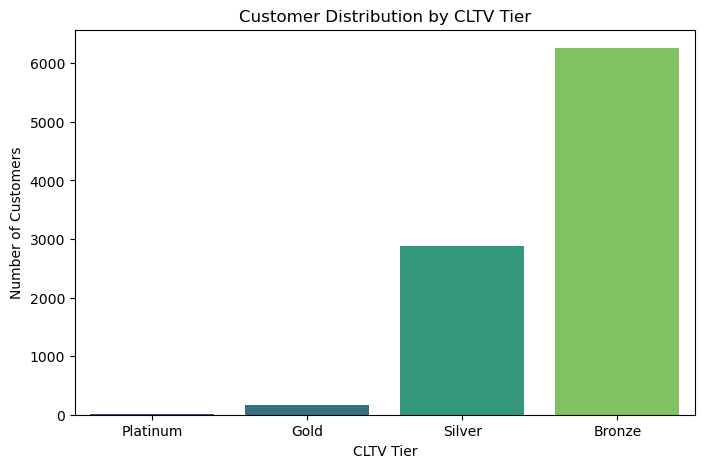

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(x='CLTV_Tier', data=summary, order=['Platinum', 'Gold', 'Silver', 'Bronze'], palette='viridis')
plt.title('Customer Distribution by CLTV Tier')
plt.xlabel('CLTV Tier')
plt.ylabel('Number of Customers')
plt.show()


### Interpretation: Red Flags + Gold Mines
#### Red Flag: You're Sitting on a Sea of Low-Value Customers
The majority of your customer base is making occasional or low-profit purchases.
    This could mean:

1. Low purchase frequency (order once and vanish).
2. Negative or slim profit margins.
3. Products with high returns/low retention.

#### Opportunity: Invest in Silver, Pamper the Gold & Platinum
Silver customers show potential — they're not quite there yet, but could become high-value with:
1. Personalized offers
2. Loyalty programs
3. Win-back email flows

Gold/Platinum customers are your power players — if you're not treating them like royalty, you're leaving revenue on the table.

## SURVIAL ANALYSIS -- CHURN RATE

T = total observation period (already in your data)
 
Let's assume churn if no order in last 180 days

In [84]:
from lifelines import KaplanMeierFitter

In [85]:
summary['churned'] = summary['recency'].apply(lambda x: 1 if x > 180 else 0)

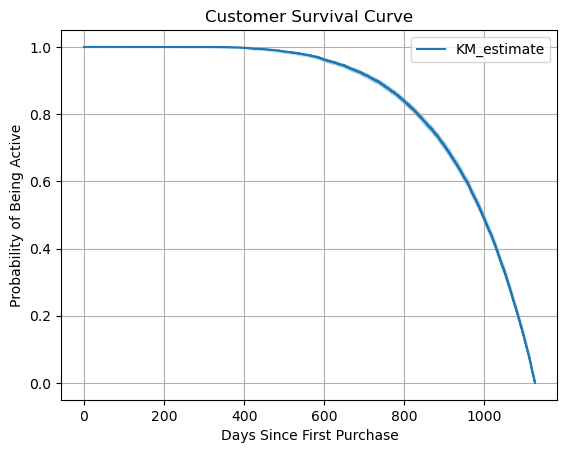

In [86]:
kmf = KaplanMeierFitter()

T = summary['T']              # time observed
E = summary['churned']        # churned or not

kmf.fit(T, event_observed=E)

# Plot survival curve
kmf.plot_survival_function()
plt.title("Customer Survival Curve")
plt.xlabel("Days Since First Purchase")
plt.ylabel("Probability of Being Active")
plt.grid(True)
plt.show()


Key Takeaways:

1. High Early Retention
    1. From day 0 to around day 600, the curve remains relatively flat and close to 1.
    2. This means most customers are sticking around during this initial period. Early churn is low — excellent sign.

2. Onset of Decline (~ Day 700+)
    1. After around 700–800 days, the curve starts to dip sharply.
    2. This is the tipping point where a large chunk of customers start dropping off.

3. Mass Exodus After Day 900
    1. Between day 900 to 1100, there’s a steep drop.
    2. Nearly all remaining customers churn by the end.
    3. Your business may be failing to re-engage long-tenure customers or offer incentives to stick around.

4. Median Survival Time?
    1. The median survival time is the point where the curve crosses 0.5 (50% of customers remain).
    2. That looks like somewhere between 850–900 days.
    3. After that, odds of retention drop drastically.

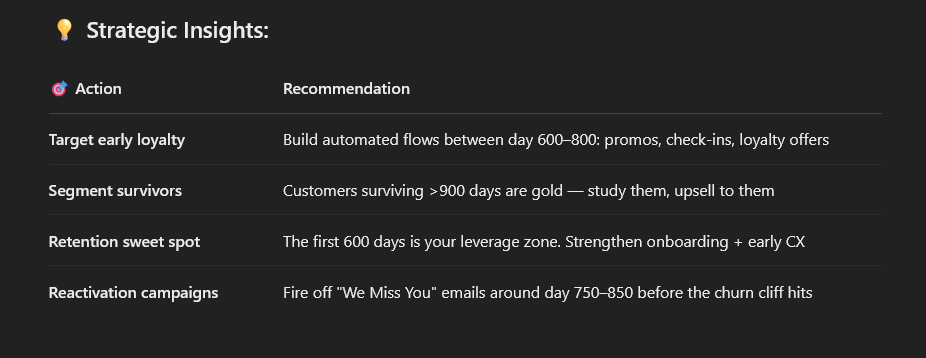

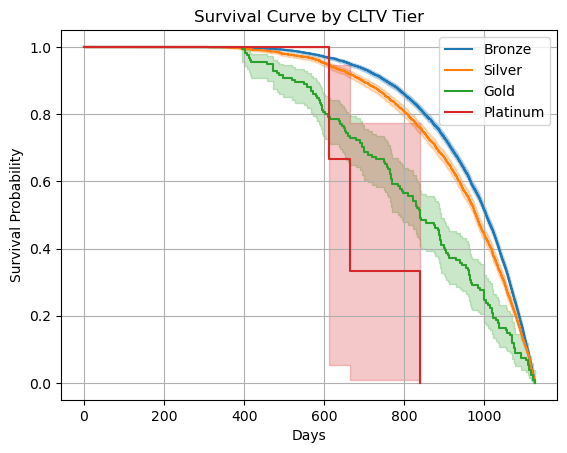

In [87]:
for tier in summary['CLTV_Tier'].unique():
    mask = summary['CLTV_Tier'] == tier
    kmf.fit(T[mask], E[mask], label=str(tier))
    kmf.plot_survival_function()

plt.title("Survival Curve by CLTV Tier")
plt.xlabel("Days")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.show()


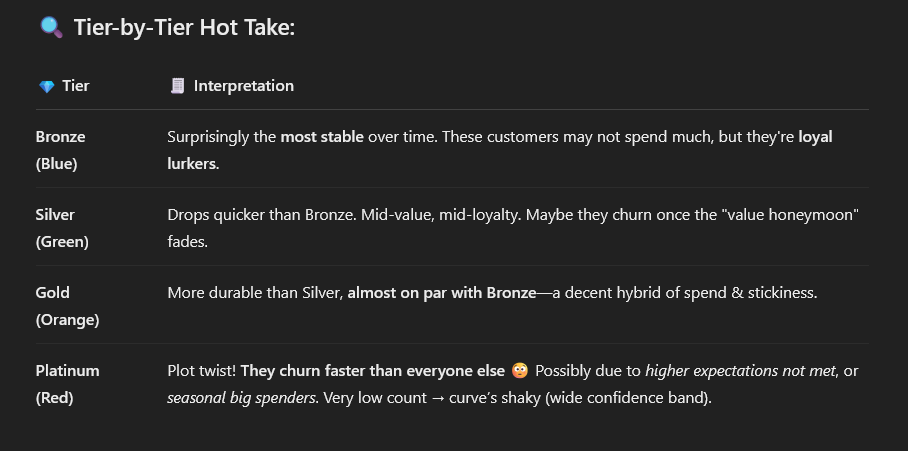